# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# import mean_absolute_error and mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
# Check the shape of your data
spaceship.shape


(8693, 14)

**Check for data types**

In [4]:
# Check for data types
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
# Cambia tipo columna "Transported" a bool:
spaceship['Transported'] = spaceship['Transported'].astype(int)

spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int32
dtype: object

**Check for missing values**

In [6]:
# Check for missing values
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [7]:
# drop rows containing any missing value
spaceship = spaceship.dropna()

spaceship.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [8]:
spaceship['Cabin'].value_counts()

Cabin
G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: count, Length: 5305, dtype: int64

In [9]:
# Column `Cabin` is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}
spaceship['Cabin'] = spaceship['Cabin'].str[0]

spaceship['Cabin'].value_counts()

Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

- Drop PassengerId and Name

In [10]:
spaceship.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [11]:
# Drop PassengerId and Name
spaceship = spaceship.drop(['PassengerId', 'Name'], axis=1)

spaceship.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

- For non-numerical columns, do dummies. (One Hot Encoding)

In [12]:
# Show non-numerical columns: HomePlanet, CryoSleep, Cabin, Destination, VIP, Transported
spaceship.select_dtypes(include='object')

# Describe all "T" 
spaceship.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HomePlanet,6606,3,Earth,3566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,6606,2,False,4274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,6606,8,F,2152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,6606,3,TRAPPIST-1e,4576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,6606.0,NaN,NaN,NaN,28.894036,14.533429,0.0,19.0,27.0,38.0,79.0
VIP,6606,2,False,6444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,6606.0,NaN,NaN,NaN,222.991674,644.987936,0.0,0.0,0.0,49.0,9920.0
FoodCourt,6606.0,NaN,NaN,NaN,478.958523,1678.592291,0.0,0.0,0.0,82.75,29813.0
ShoppingMall,6606.0,NaN,NaN,NaN,178.356494,576.328407,0.0,0.0,0.0,30.0,12253.0
Spa,6606.0,NaN,NaN,NaN,313.16152,1144.016291,0.0,0.0,0.0,65.0,22408.0


In [13]:
# For non-numerical columns (HomePlanet, CryoSleep, Destination, VIP, Transported), do dummies:
# spaceship = pd.get_dummies(spaceship, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], drop_first=True)
# spaceship = pd.get_dummies(spaceship, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination'], drop_first=True)

# Get all non numerical columns and do dummies
non_numerical_columns = spaceship.select_dtypes(include='object').columns
spaceship = pd.get_dummies(spaceship, columns=non_numerical_columns, drop_first=True)

spaceship.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,6606.0,NaN,NaN,NaN,28.894036,14.533429,0.0,19.0,27.0,38.0,79.0
RoomService,6606.0,NaN,NaN,NaN,222.991674,644.987936,0.0,0.0,0.0,49.0,9920.0
FoodCourt,6606.0,NaN,NaN,NaN,478.958523,1678.592291,0.0,0.0,0.0,82.75,29813.0
ShoppingMall,6606.0,NaN,NaN,NaN,178.356494,576.328407,0.0,0.0,0.0,30.0,12253.0
Spa,6606.0,NaN,NaN,NaN,313.16152,1144.016291,0.0,0.0,0.0,65.0,22408.0
VRDeck,6606.0,NaN,NaN,NaN,303.780048,1127.142166,0.0,0.0,0.0,52.0,20336.0
Transported,6606.0,NaN,NaN,NaN,0.503633,0.500025,0.0,0.0,1.0,1.0,1.0
HomePlanet_Europa,6606,2,False,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet_Mars,6606,2,False,5239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep_True,6606,2,False,4274,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# NO HACER ESTO ESTA VEZ !!!!!! Select only numerical columns
#spaceship = spaceship.select_dtypes(include=[np.number])

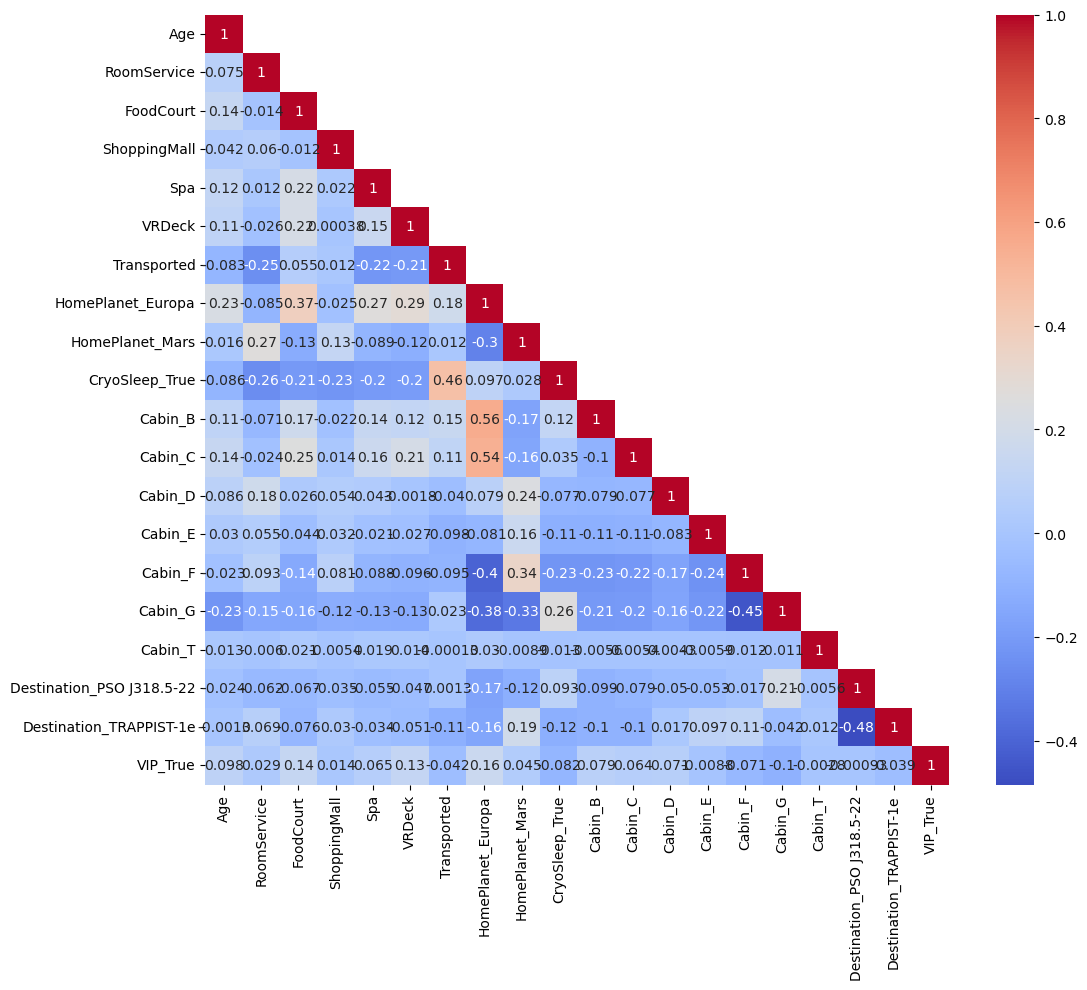

In [15]:
# Show heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(spaceship.corr(), annot=True, cmap='coolwarm', mask=np.triu(spaceship.corr(), k=1))
plt.show()

**Perform Train Test Split**

In [16]:
# Perform Train Test Split:
X = spaceship.drop('Transported', axis=1)
y = spaceship['Transported']

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [17]:
# Model Selection: In this exercise we will be using **KNN** as our predictive model:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Evaluate your model's performance. Comment it

In [18]:
# Evaluate your model's performance.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the test data
y_pred = knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_score}')


Accuracy: 0.7904689863842662


## Normalizando el modelo

In [19]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [20]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [21]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.316456,0.0,0.056116,0.000000,0.028650,0.030094,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.455696,0.0,0.088015,0.135232,0.124911,0.000049,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.430380,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.468354,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.278481,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [22]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.367089,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.164557,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.632911,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.075949,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.468354,0.024458,0.000101,0.049049,0.000045,0.003344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
# Fit the model on the training data
knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [24]:
# Predict the test data
y_pred = knn.predict(X_test_norm)

# import 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print("MAE", mean_absolute_error(y_pred, y_test))
print("RMSE", mean_squared_error(y_pred, y_test, squared=False))
print("R2 score", knn.score(X_test_norm, y_test))


Accuracy: 0.7700453857791225
MAE 0.22995461422087746
RMSE 0.47953583205103395
R2 score 0.7700453857791225


c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
